# Libs

In [1]:
!pip install kaggle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os
import warnings

In [3]:
np.set_printoptions(suppress=True)
warnings.filterwarnings('ignore')

# Data Collection

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/.kaggle"
!mkdir -p /content/.kaggle
!cp kaggle.json /content/.kaggle/

In [5]:
!kaggle datasets download -d ealaxi/paysim1

Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1
License(s): CC-BY-SA-4.0
 52% 93.0M/178M [00:00<00:00, 969MB/s]
100% 178M/178M [00:00<00:00, 582MB/s] 


In [6]:
!unzip /content/paysim1.zip -d /content/

Archive:  /content/paysim1.zip
  inflating: /content/PS_20174392719_1491204439457_log.csv  


In [7]:
df = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [8]:
df.shape

(6362620, 11)

In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [11]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1530544995,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


**Variable Descriptions**
- `step` - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

- `type` - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

- `amount` -
amount of the transaction in local currency.

- `nameOrig` - customer who started the transaction

- `oldbalanceOrg` - initial balance before the transaction

- `newbalanceOrig` - new balance after the transaction.

- `nameDest` - customer who is the recipient of the transaction

- `oldbalanceDest` - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

- `newbalanceDest` - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

- `isFraud` - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

- `isFlaggedFraud` - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

# Data Preprocessing

In [13]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [14]:
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [15]:
df.duplicated().sum()

np.int64(0)

There is no null, NaN values, no duplicated rows

In [16]:
df.nunique()

,0
step,743
type,5
amount,5316900
nameOrig,6353307
oldbalanceOrg,1845844
newbalanceOrig,2682586
nameDest,2722362
oldbalanceDest,3614697
newbalanceDest,3555499
isFraud,2


In [17]:
# standardize column names (Orig stands for Original)
df = df.rename(columns={'oldbalanceOrg': 'oldbalanceOrig'})

# set the right data type for each column
df['type'] = df['type'].astype('category')
df['isFraud'] = df['isFraud'].astype(np.int8)
df['nameOrig'] = df['nameOrig'].astype('string')
df['nameDest'] = df['nameDest'].astype('string')
df['amount'] = df['amount'].astype(np.float64)

# identify account type based on customer names
df['orgType'] = df['nameOrig'].apply(lambda x: 'Merchant' if x.startswith('M') else ('Customer' if x.startswith('C') else 'Other'))
df['destType'] = df['nameDest'].apply(lambda x: 'Merchant' if x.startswith('M') else ('Customer' if x.startswith('C') else 'Other'))

In [18]:
def if_successful_transaction(row):
    '''
    Determine whether a transaction is successful based on balance changes.

    A transaction is considered successful if either:
    1. The sender's (origin) balance decreases exactly by the transaction amount.
    2. The recipient's (destination) balance increases (or decreases) exactly by the transaction amount.

    Parameters:
        row (Series): A row from the transaction DataFrame.

    Returns:
        bool: True if the transaction reflects a valid balance change, otherwise False.
    '''

    # Condition 1: Origin balance decreases by the amount
    origin_ok = abs(row['oldbalanceOrig'] - row['newbalanceOrig']) == row['amount']

    # Condition 2: Destination balance increases or decreases by the amount
    dest_ok = abs(row['oldbalanceDest'] - row['newbalanceDest']) == row['amount']

    return origin_ok or dest_ok  # Successful if either account reflects the correct movement

df['successful_transaction'] = df.apply(if_successful_transaction, axis=1)

In [65]:
df['successful_transaction'].value_counts()

,count
successful_transaction,
False,4609853
True,1752767


# Problem Statement

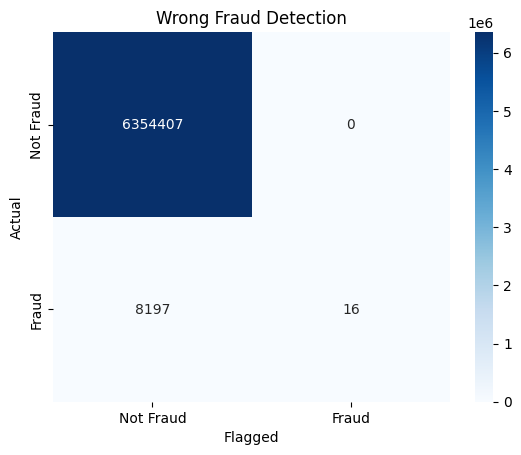

In [74]:
# Create confusion matrix
cm = confusion_matrix(df['isFraud'], df['isFlaggedFraud'])

# Plot it with seaborn for better visuals
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
             xticklabels=["Not Fraud", "Fraud"],
            yticklabels=["Not Fraud", "Fraud"])

plt.xlabel('Flagged')
plt.ylabel('Actual')
plt.title('Wrong Fraud Detection')
plt.show()

# EDA
1. What kinds of transactions were Fraud and labeled as Fraud ?
2. What kinds of transactions were Fraud but not labeled as Fraud ?
3. Any fraud transactions with merchant accounts (without information provided) ?

In [22]:
fraud_trans = df[df['isFraud']==1]

In [77]:
colors = [
    '#002F5F',  # Dark navy
    '#FDB813',  # Yellow-orange
    '#F37021',  # Orange-gold
    '#7B1E3B',  # Deep maroon (replaces white)
    '#005B4F'   # Deep teal-green
]


## Type

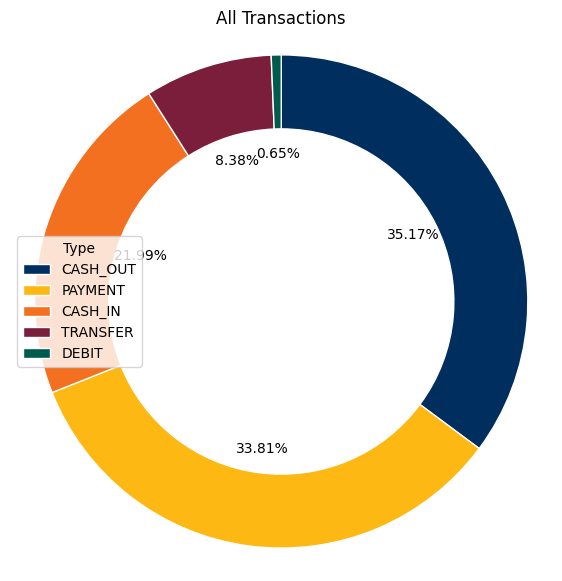

In [81]:
# Extract fraud counts by type
counts = df['type'].value_counts()
counts = counts[counts > 0]  # Removes any type with zero count
labels = counts.index
sizes = counts.values

# Plot donut chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, colors=colors, startangle=90, counterclock=False,
        autopct='%1.2f%%', wedgeprops={'width': 0.3, 'edgecolor': 'white'})

plt.title('All Transactions')
plt.legend(labels, title='Type', loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')  # Keeps it circular
plt.show()

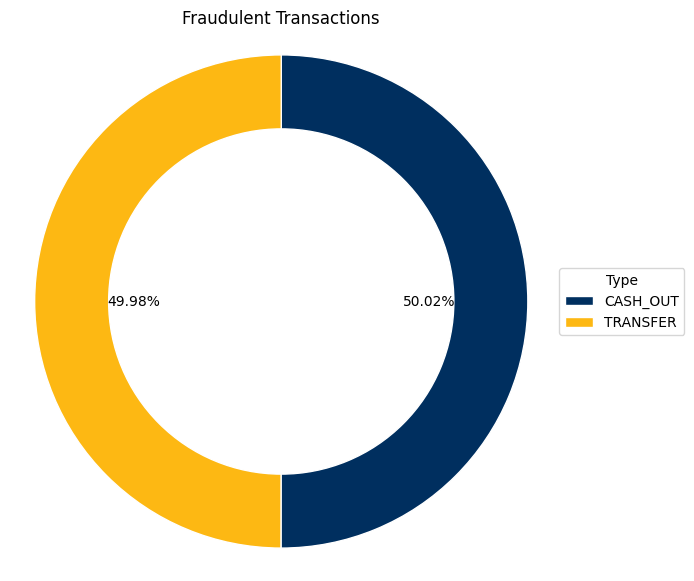

In [79]:
# Extract fraud counts by type
counts = fraud_trans['type'].value_counts()
counts = counts[counts > 0]  # Removes any type with zero count
labels = counts.index
sizes = counts.values

# Plot donut chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, colors=colors, startangle=90, counterclock=False,
        autopct='%1.2f%%', wedgeprops={'width': 0.3, 'edgecolor': 'white'})

plt.title('Fraudulent Transactions')
plt.axis('equal')  # Keeps it circular
plt.show()

## Amount

In [28]:
fraud_trans['amount'].describe()

,amount
count,8.213000e+03
mean,1.467967e+06
std,2.404253e+06
min,0.000000e+00
25%,1.270913e+05
50%,4.414234e+05
75%,1.517771e+06
max,1.000000e+07


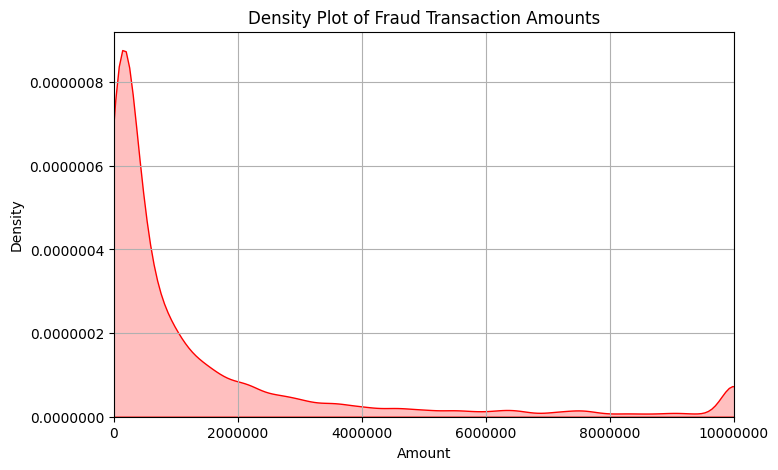

In [29]:
# Plot density graph for the 'amount' column
plt.figure(figsize=(8, 5))
sns.kdeplot(data=fraud_trans, x='amount', shade=True, color='red', bw_adjust=0.5)

plt.title('Density Plot of Fraud Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.xlim(0, fraud_trans['amount'].quantile(0.99))
plt.grid(True)
plt.ticklabel_format(axis='both', style='plain')
plt.show()

In [30]:
df[df['amount']==0]

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orgType,destType,successful_transaction
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0,Customer,Customer,True
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0,Customer,Customer,True
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0,Customer,Customer,True
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0,Customer,Customer,True
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0,Customer,Customer,True
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0,Customer,Customer,True
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0,Customer,Customer,True
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0,Customer,Customer,True
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0,Customer,Customer,True
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0,Customer,Customer,True


Look at last 2 cols, transactions with amount as 0 are fraud but not labeled

Consider it later as would it cause any incon in the future or not ?

All are transactions between customer, the sender has none of money in their account  

In [50]:
fraud_trans = fraud_trans[fraud_trans['amount'] != 0]

## Org name
All customers

## Dest name

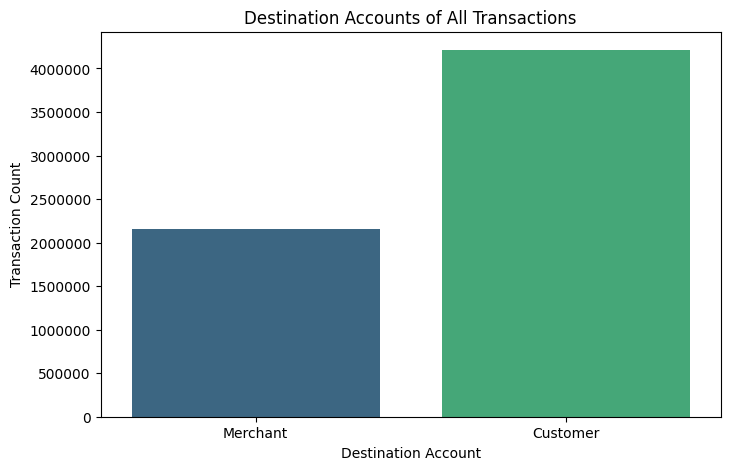

In [56]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='destType', palette='viridis', order=['Merchant', 'Customer'])

plt.title('Destination Accounts of All Transactions')
plt.xlabel('Destination Account')
plt.ylabel('Transaction Count')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

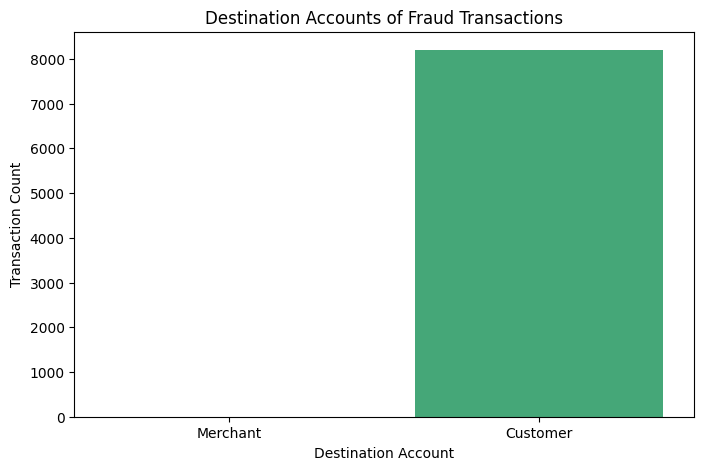

In [59]:
plt.figure(figsize=(8, 5))
sns.countplot(data=fraud_trans, x='destType', palette='viridis', order=['Merchant', 'Customer'])

plt.title('Destination Accounts of Fraud Transactions')
plt.xlabel('Destination Account')
plt.ylabel('Transaction Count')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

## Balance
Check if transaction amount and new, old balance is right

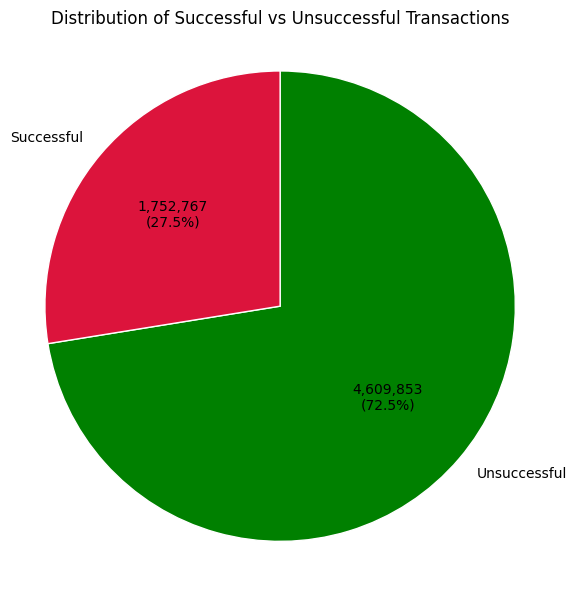

In [60]:
import matplotlib.pyplot as plt

# 1. Calculate value counts (excluding any NaNs if necessary)
counts = df['successful_transaction'].value_counts()
labels = counts.index.map({True: 'Successful', False: 'Unsuccessful'})
sizes = counts.values
colors = ['green', 'crimson']  # Feel free to customize

# 2. Define custom label formatter
def format_labels(values):
    def formatter(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{count:,}\n({pct:.1f}%)'
    return formatter

# 3. Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct=format_labels(sizes),
    startangle=90,
    counterclock=False,
    wedgeprops=dict(edgecolor='white')
)

# 4. Chart formatting
plt.title('Distribution of Successful vs Unsuccessful Transactions')
plt.axis('equal')  # Keep it circular
plt.tight_layout()
plt.show()


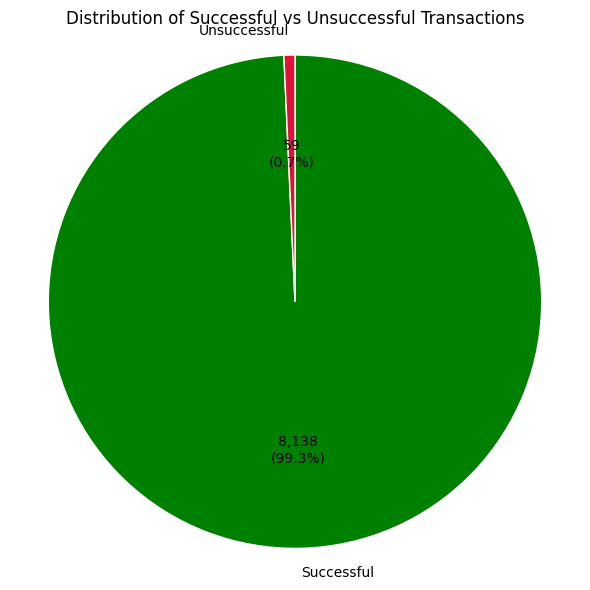

In [61]:
import matplotlib.pyplot as plt

# 1. Calculate value counts (excluding any NaNs if necessary)
counts = fraud_trans['successful_transaction'].value_counts()
labels = counts.index.map({True: 'Successful', False: 'Unsuccessful'})
sizes = counts.values
colors = ['green', 'crimson']  # Feel free to customize

# 2. Define custom label formatter
def format_labels(values):
    def formatter(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{count:,}\n({pct:.1f}%)'
    return formatter

# 3. Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct=format_labels(sizes),
    startangle=90,
    counterclock=False,
    wedgeprops=dict(edgecolor='white')
)

# 4. Chart formatting
plt.title('Distribution of Successful vs Unsuccessful Transactions')
plt.axis('equal')  # Keep it circular
plt.tight_layout()
plt.show()
